In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"loan_data.csv")

In [3]:
df

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,employed,Rejected
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [5]:
df.shape

(24000, 7)

In [6]:
df.size

168000

In [7]:
df.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [8]:
df.isnull().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

In [9]:
df = df.drop(['Text'],axis=1)
df

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,employed,Rejected
1,197392,389,111604,22.14,employed,Rejected
2,44561,523,34118,45.44,employed,Rejected
3,190363,729,118757,10.22,unemployed,Rejected
4,61853,732,19210,44.13,employed,Approved
...,...,...,...,...,...,...
23995,195242,817,16403,24.32,employed,Approved
23996,150246,729,101572,9.97,employed,Rejected
23997,64571,650,30533,57.35,employed,Rejected
23998,115825,418,89837,10.37,unemployed,Rejected


In [10]:
df.replace({'Employment_Status':{'employed':1, 'unemployed':0}},inplace=True)  

In [11]:
df.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,1,Rejected
1,197392,389,111604,22.14,1,Rejected
2,44561,523,34118,45.44,1,Rejected
3,190363,729,118757,10.22,0,Rejected
4,61853,732,19210,44.13,1,Approved


In [12]:
df.replace({'Approval':{'Approved':1, 'Rejected':0}},inplace=True)  

In [13]:
df.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,26556,581,8314,79.26,1,0
1,197392,389,111604,22.14,1,0
2,44561,523,34118,45.44,1,0
3,190363,729,118757,10.22,0,0
4,61853,732,19210,44.13,1,1


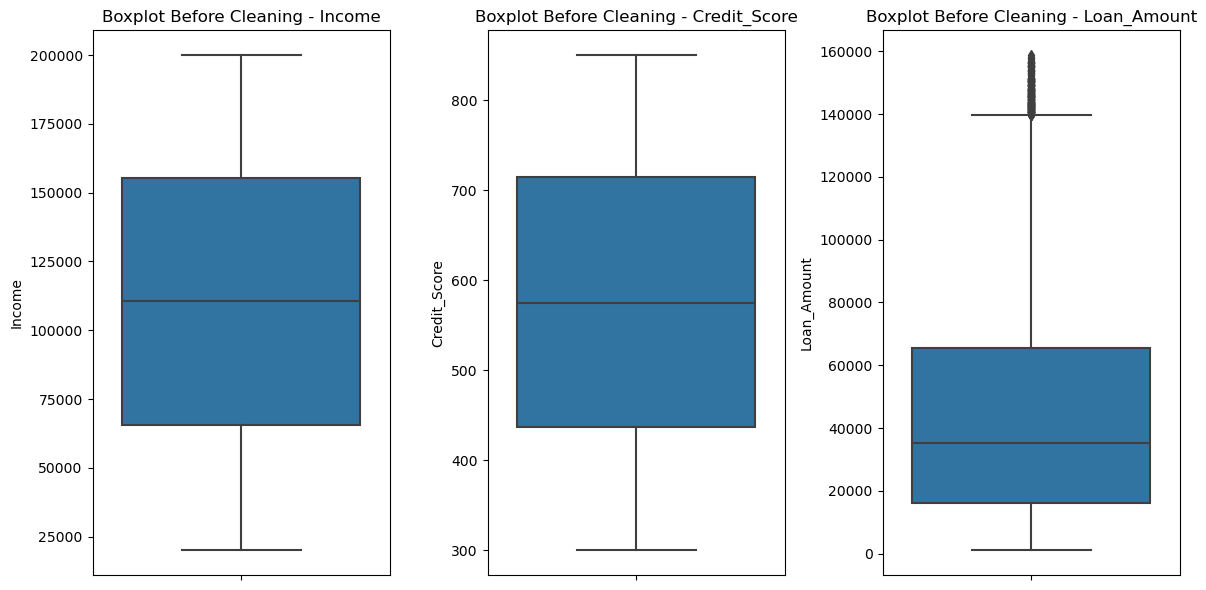

In [14]:
# Boxplots befor removing outliers
plt.figure(figsize = (12,6))
columns = ['Income','Credit_Score','Loan_Amount']
for i , col in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot Before Cleaning - {col}')
plt.tight_layout()
plt.show()

In [15]:
#  Remove outliers from df(in-place)
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df = df[(df[col]>= lower_bound) & (df[col]<=upper_bound)]

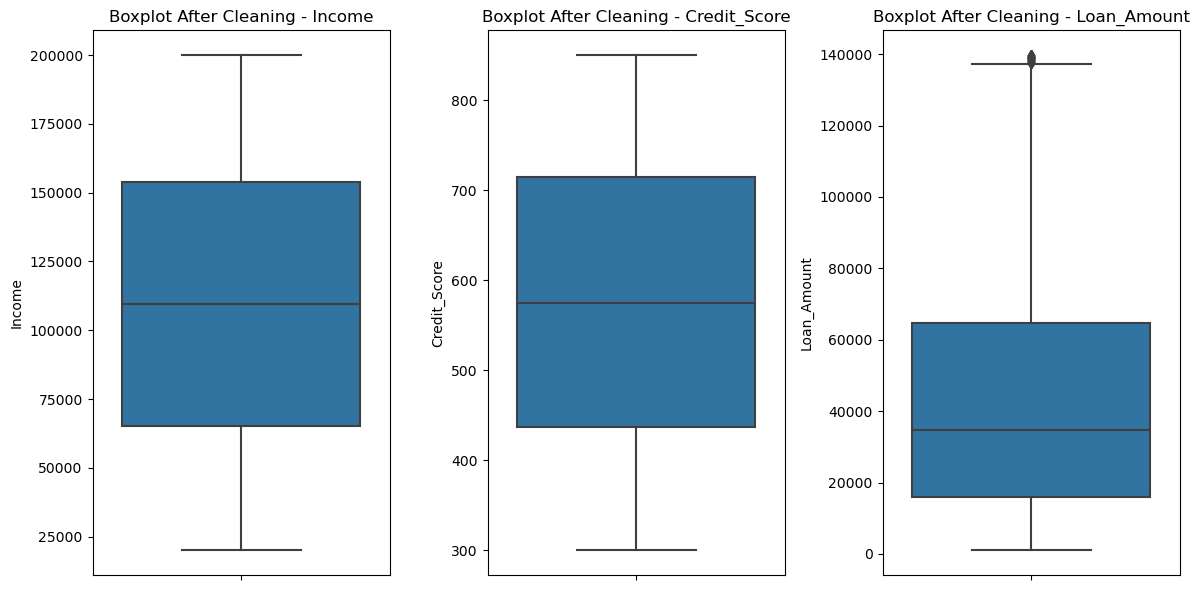

In [16]:
#  Boxplots after removing outliers
plt.figure(figsize = (12,6))
for i , col in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot After Cleaning - {col}')
plt.tight_layout()
plt.show()

In [17]:
print("Final Cleaned dataset shape:",df.shape)

Final Cleaned dataset shape: (23775, 6)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
x=df.drop(['Approval'],axis=1)
y=df['Approval']

In [20]:
x

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status
0,26556,581,8314,79.26,1
1,197392,389,111604,22.14,1
2,44561,523,34118,45.44,1
3,190363,729,118757,10.22,0
4,61853,732,19210,44.13,1
...,...,...,...,...,...
23995,195242,817,16403,24.32,1
23996,150246,729,101572,9.97,1
23997,64571,650,30533,57.35,1
23998,115825,418,89837,10.37,0


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 # model evaluation 

In [24]:
x_train_prediction = model.predict(x_train)
train_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [25]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [26]:
print("training data score:",train_data_accuracy)
print("testing data score:",test_data_accuracy)

training data score: 0.8695583596214511
testing data score: 0.8651945320715037
